<a href="https://colab.research.google.com/github/lohitha1808/Cats_dogs/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 42.8MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', #cats=0,dogs=1
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) #pixel to be between 0-1 rather than 0-255
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.6173 - accuracy: 0.5731 - val_loss: 0.6606 - val_accuracy: 0.6332
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6450 - accuracy: 0.6387 - val_loss: 0.6349 - val_accuracy: 0.6530
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6053 - accuracy: 0.6786 - val_loss: 0.6511 - val_accuracy: 0.6692
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5492 - accuracy: 0.7292 - val_loss: 0.5769 - val_accuracy: 0.6986
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5109 - accuracy: 0.7630 - val_loss: 0.5117 - val_accuracy: 0.7560
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4718 - accuracy: 0.7841 - val_loss: 0.6068 - val_accuracy: 0.7656
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4271 - accuracy: 0.8130 - val_loss: 0.4573 - val_ac

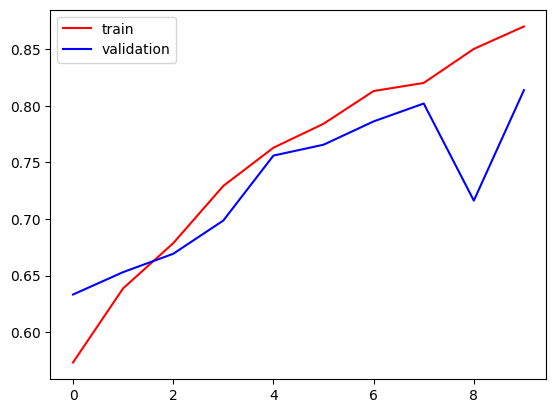

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

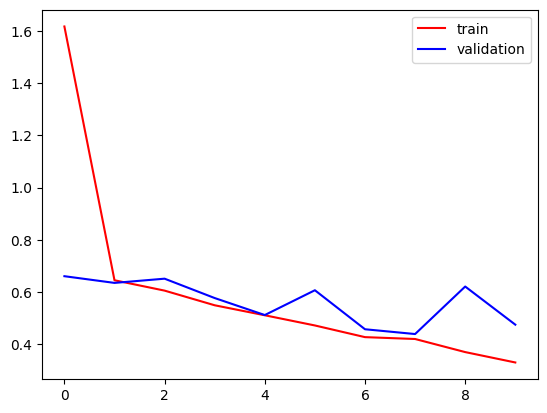

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

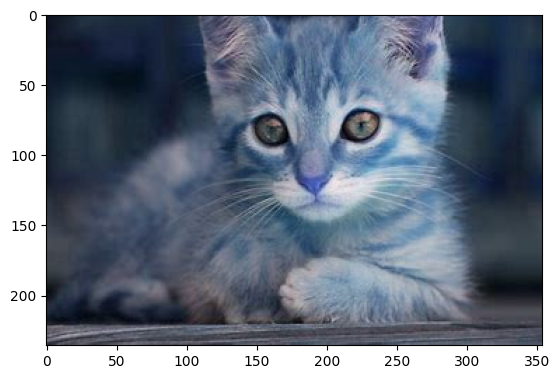

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(236, 354, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 253ms/step


array([[0.0892635]], dtype=float32)

In [ ]:
test_img1 = cv2.imread('/content/dog.jpg')

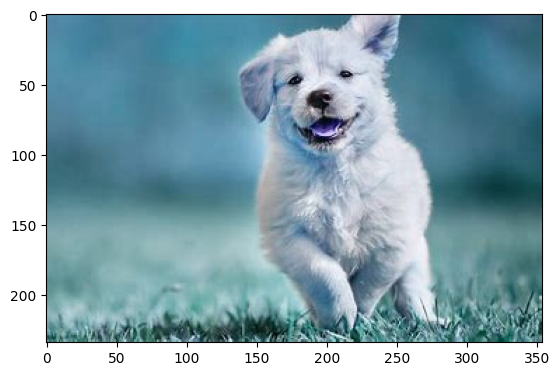

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

(234, 354, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)